# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("b1abb33c4f.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
bins = [-1, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['Categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels)

       APGAR5 Categoria_APGAR5
0        10.0           normal
1         9.0           normal
2        10.0           normal
3        10.0           normal
4        10.0           normal
...       ...              ...
27023     9.0           normal
27024     9.0           normal
27025    10.0           normal
27026     9.0           normal
27027     8.0           normal

[27028 rows x 2 columns]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

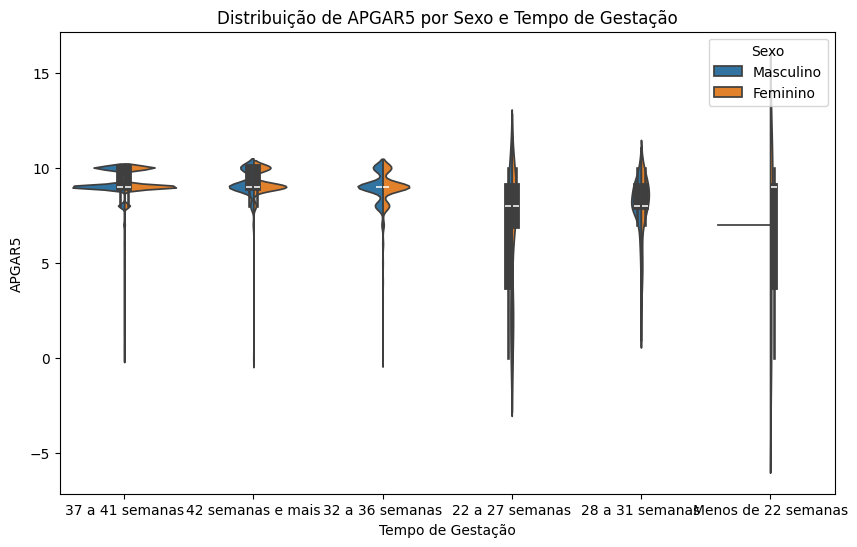

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, split=True)
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [10]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela_cruzada.head()

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [16]:
import pandas as pd

percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

percentuais_linha.head()

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

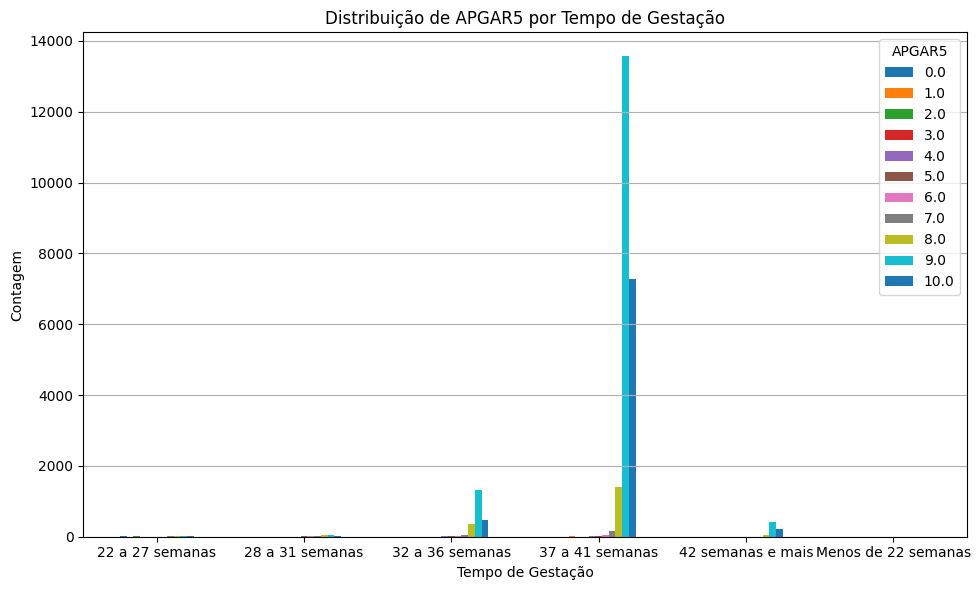

In [17]:
tabela_cruzada.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='APGAR5')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

A vitalidade é exponencialmente melhor nos bebês de 37 á 41 semanas. Isso suporta a afirmacao dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

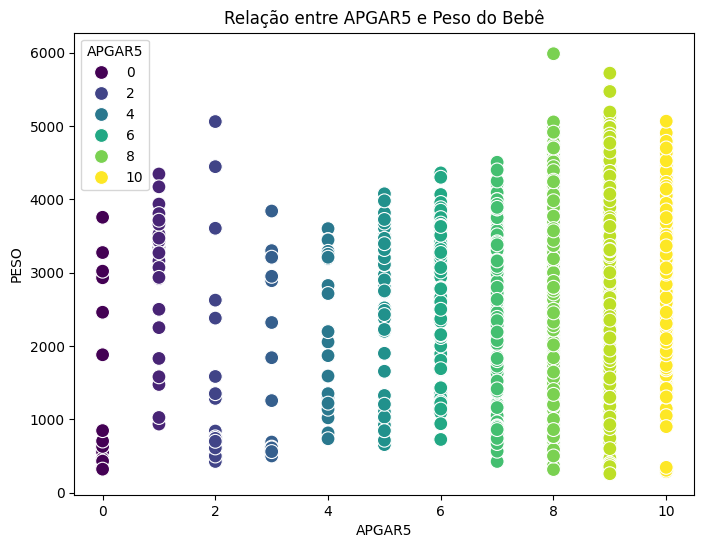

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='APGAR5', y='PESO', hue='APGAR5', palette='viridis', s=100)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.show()

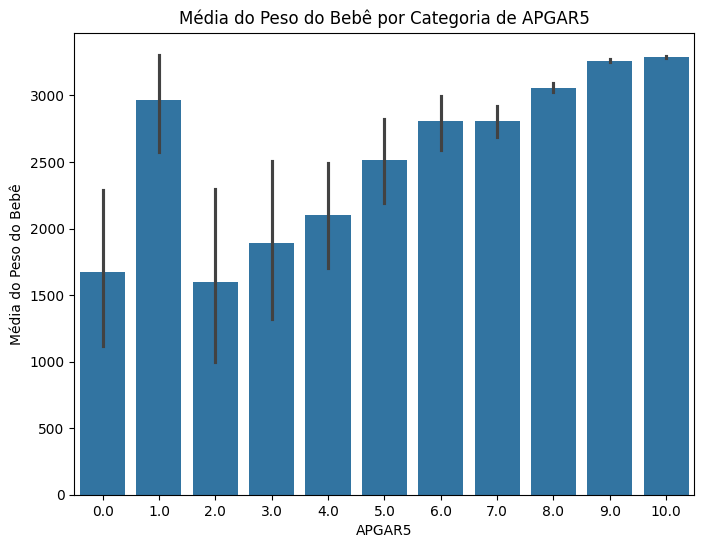

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='APGAR5', y='PESO')
plt.title('Média do Peso do Bebê por Categoria de APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Média do Peso do Bebê')
plt.show()

<Figure size 800x600 with 0 Axes>

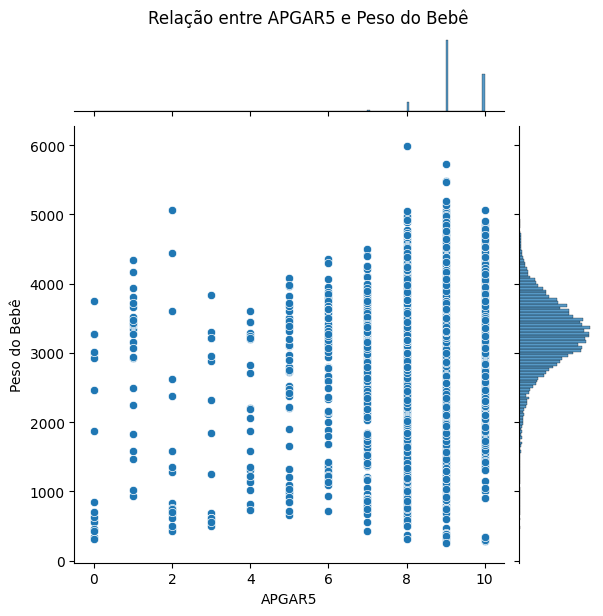

In [25]:
plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='APGAR5', y='PESO', kind='scatter')
plt.suptitle('Relação entre APGAR5 e Peso do Bebê', y=1.02)
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')
plt.show()